# Make a time series model using ARIMA

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [38]:
df = pd.read_csv('demand_data.csv')

In [39]:
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [40]:
df.tail()

timeStamp  demand  precip   temp
49200  2017-08-12 02:00:00     NaN  0.0000  70.84
49201  2017-08-12 03:00:00     NaN  0.0000  70.57
49202  2017-08-12 04:00:00     NaN  0.0000  69.89
49203  2017-08-12 05:00:00     NaN  0.0000  68.59
49204  2017-08-12 06:00:00     NaN  0.0031  67.33

In [41]:
df.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

In [42]:
df.duplicated().sum()

0

In [44]:
df.shape

(49205, 4)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [46]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [82]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [49]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [50]:
ny_df=df.set_index('timeStamp')

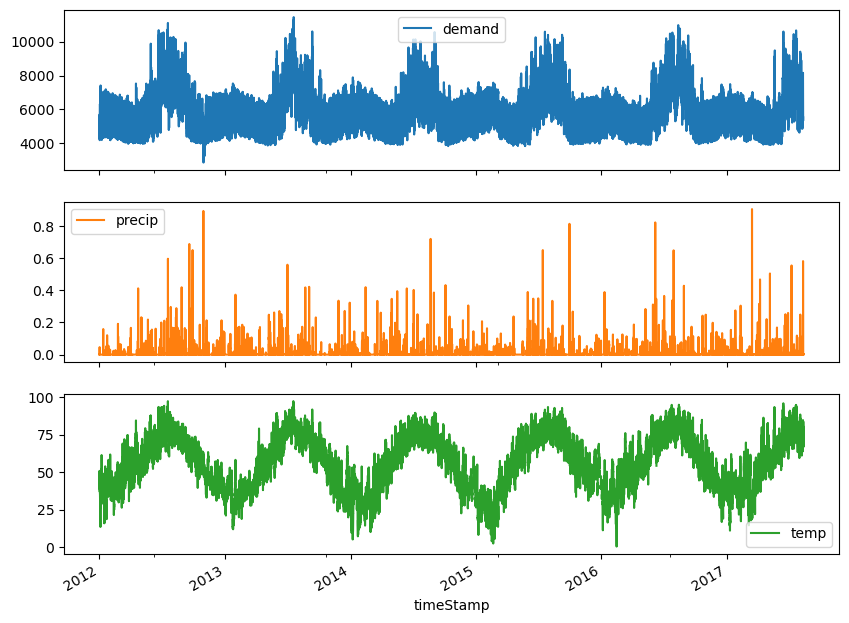

In [51]:
ny_df.plot(subplots=True)
plt.show()

In [53]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')

In [54]:
ny_df=df.set_index('timeStamp')

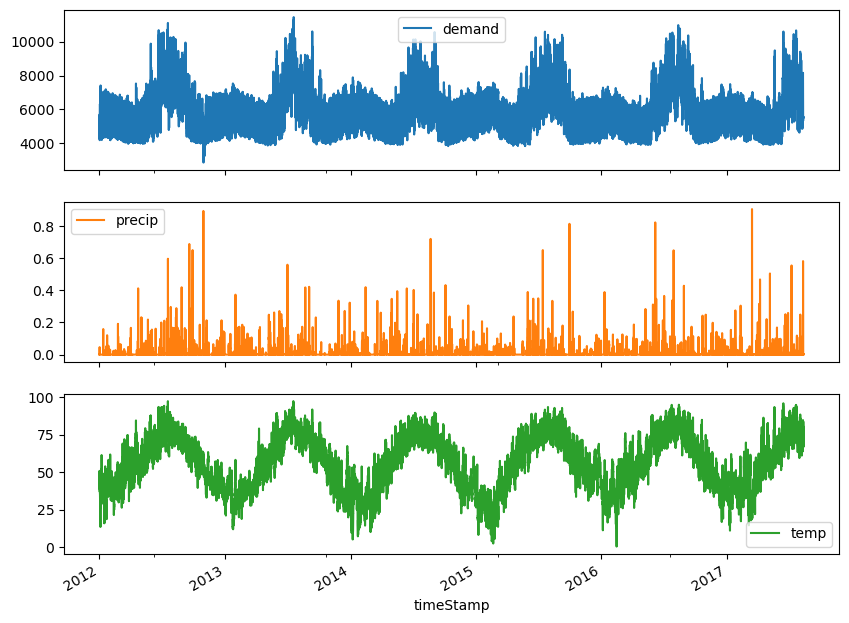

In [55]:
ny_df.plot(subplots=True)
plt.show()

In [56]:
ny_df.resample('M').mean()

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

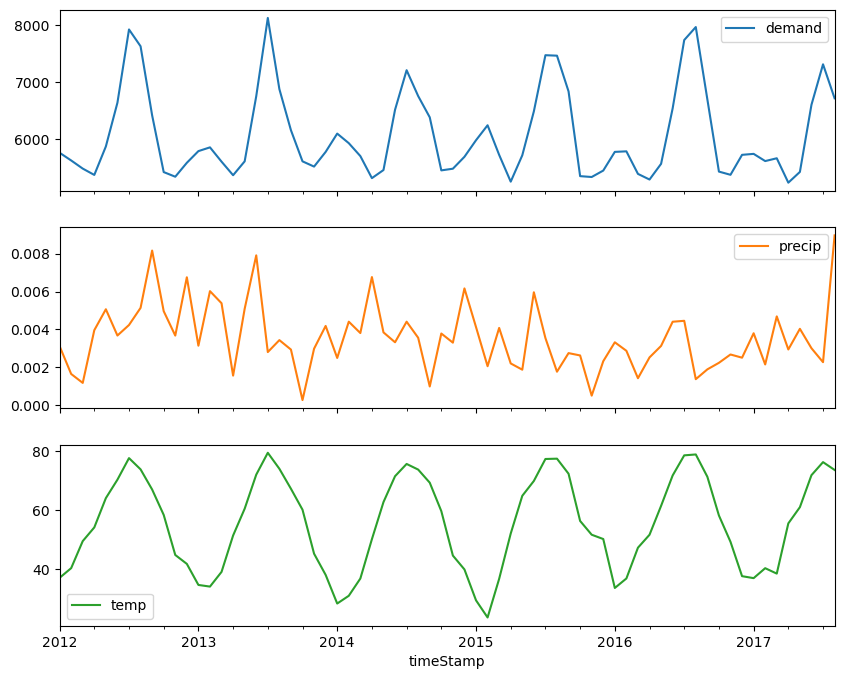

In [57]:
ny_df.resample('M').mean().plot(subplots=True)
plt.show()

In [58]:
ny_df_monthly=ny_df.resample('M').mean()

In [83]:
ny_df_monthly.head()

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078

In [85]:
from statsmodels.tsa.stattools import adfuller

In [87]:
# Perform Augmented Dickey-Fuller Test
result = adfuller(ny_df_monthly['demand'])

# Extract the test statistics
test_statistics = result[0]

# Extract the p-value from the test results
p_value = result[1]

# Extract the critical values from the test results
critical_values = result[4]

# Print the test statistics, p-value, and critical values
print(f"Test Statistics: {test_statistics}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Check if the 'demand' column is stationary based on the p-value
if p_value < 0.05:
    print("The 'demand' column is stationary.")
else:
    print("The 'demand' column is not stationary.")

Test Statistics: -9.279849335700275
P-value: 1.2597254058463581e-15
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
The 'demand' column is stationary.


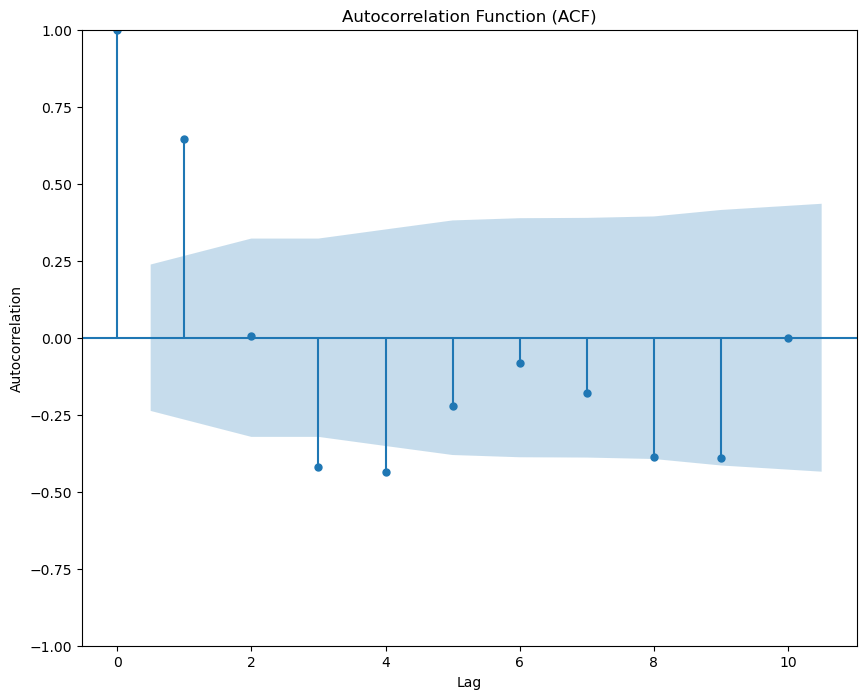

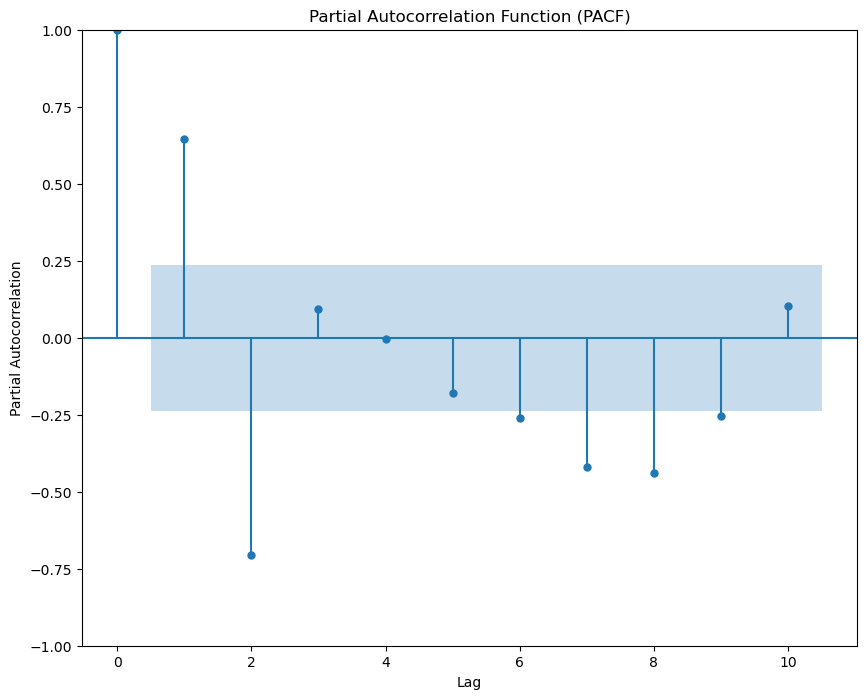

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a DataFrame named 'ny_df_monthly' with a 'demand' column

# Plot ACF
plot_acf(ny_df_monthly['demand'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) For Lag 10')
plt.show()

# Plot PACF
plot_pacf(ny_df_monthly['demand'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) For Lag 10')
plt.show()

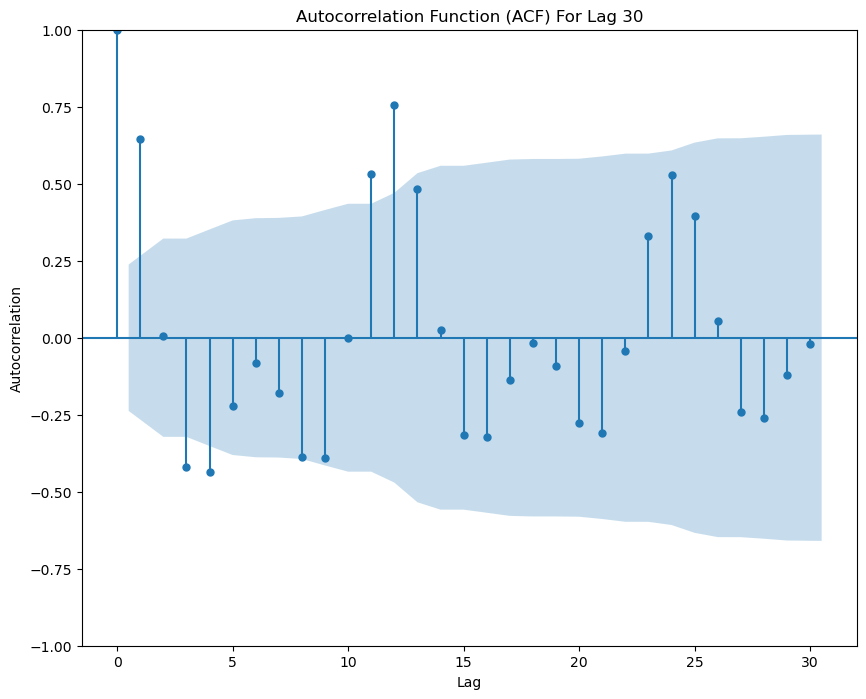

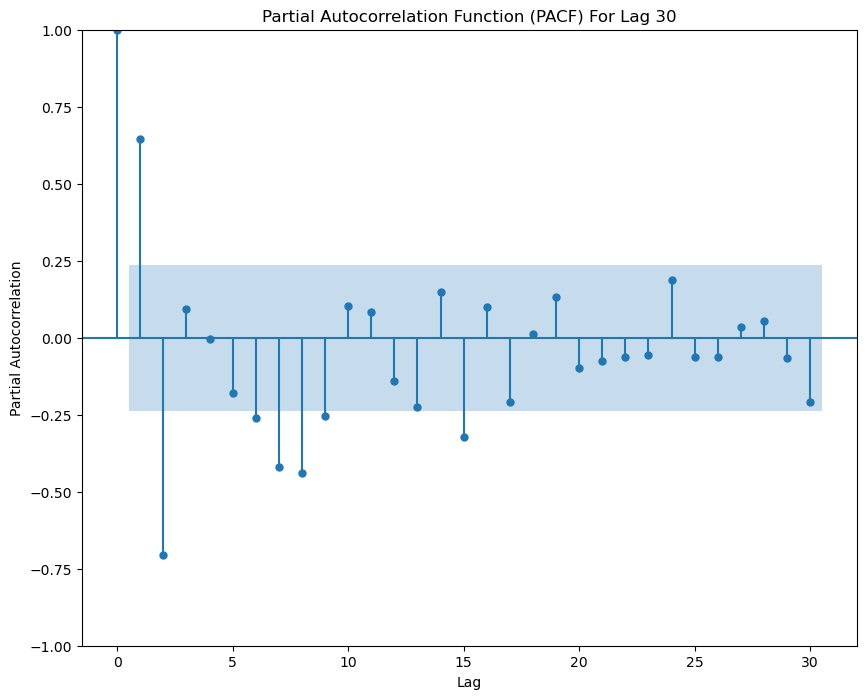

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a DataFrame named 'ny_df_monthly' with a 'demand' column

# Plot ACF
plot_acf(ny_df_monthly['demand'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) For Lag 30')
plt.show()

# Plot PACF
plot_pacf(ny_df_monthly['demand'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) For Lag 30')
plt.show()

In [59]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.328, Time=0.42 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.19 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1020.387, Time=0.49 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.06 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=99

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Wed, 18 Oct 2023   AIC                            993.144
Time:                                         17:29:07   BIC                           1006.461
Sample:                                     01-31-2012   HQIC                           998.420
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.258      4.697      0.000    2168.826    5274.419
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
ny_df_monthly

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [62]:
train=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [63]:
test

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [64]:
test.shape

(4, 3)

In [66]:
train.shape

(64, 3)

In [67]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [68]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [69]:
forecast

(2017-05-31    5320.832732
 2017-06-30    6194.150570
 2017-07-31    7184.108161
 2017-08-31    7297.999647
 Freq: M, dtype: float64,
 array([[4724.37017429, 5917.29528995],
        [5391.43559664, 6996.86554311],
        [6358.61998974, 8009.59633287],
        [6467.74938768, 8128.24990638]]))

In [70]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [71]:
forecast_df

Prediction
timeStamp              
2017-05-31  5320.832732
2017-06-30  6194.150570
2017-07-31  7184.108161
2017-08-31  7297.999647

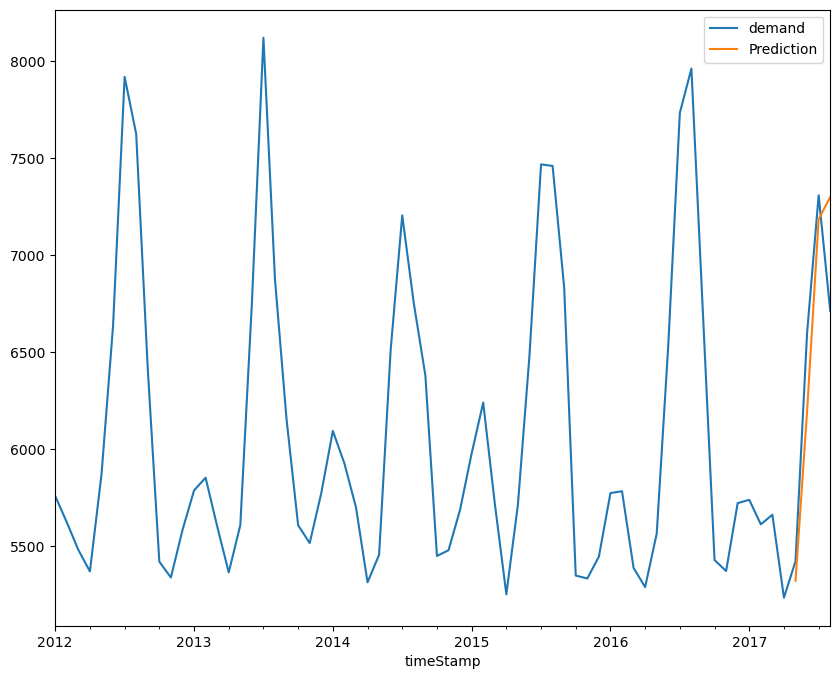

In [72]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()
plt.show()

In [73]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [74]:
forecast1

(2017-05-31    5320.832732
 2017-06-30    6194.150570
 2017-07-31    7184.108161
 2017-08-31    7297.999647
 2017-09-30    6401.927281
 2017-10-31    5789.924202
 2017-11-30    5693.039618
 2017-12-31    5951.573088
 Freq: M, dtype: float64,
 array([[4724.37017429, 5917.29528995],
        [5391.43559664, 6996.86554311],
        [6358.61998974, 8009.59633287],
        [6467.74938768, 8128.24990638],
        [5553.64732099, 7250.20724157],
        [4934.10752026, 6645.74088286],
        [4837.08537975, 6548.99385542],
        [5094.94721594, 6808.19896066]]))

In [75]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')

In [76]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

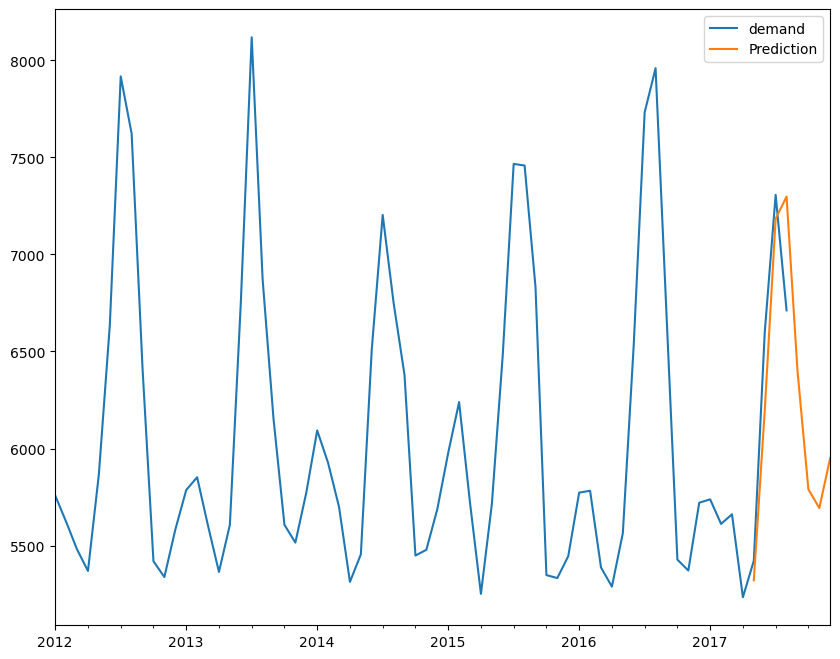

In [78]:
pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()
plt.show()

In [79]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

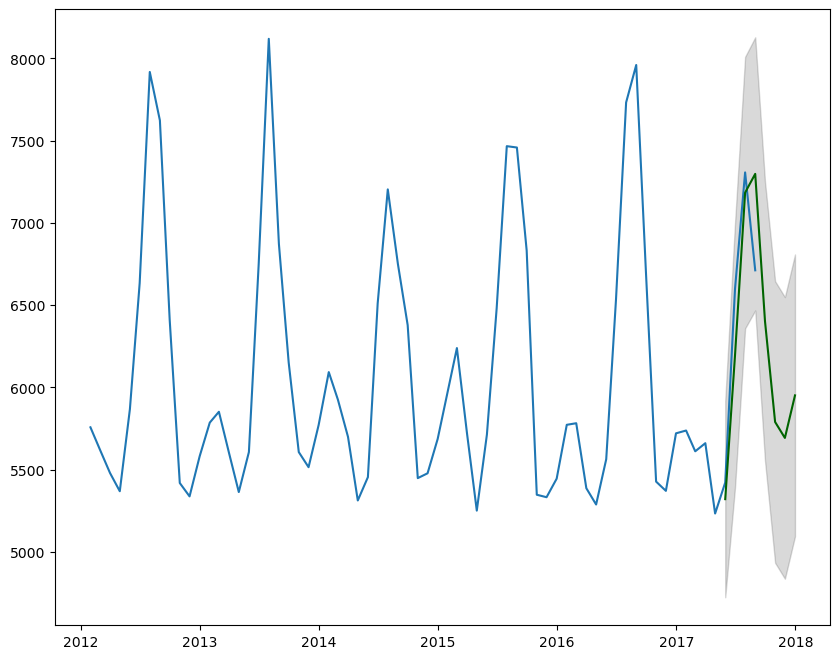

In [80]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

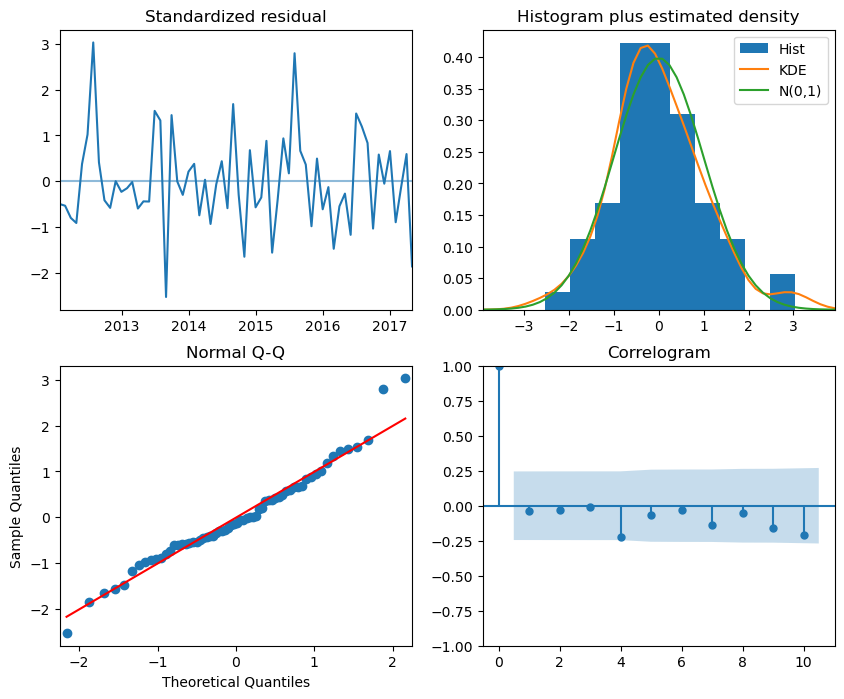

In [81]:
out=model.plot_diagnostics()